<a href="https://colab.research.google.com/github/Valosun/PongCPP/blob/main/LCA3BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Pan for files, num for nums, mat for graphs, sea for clean, sk for regress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [38]:
#UCIML data loading cleve
df = pd.read_csv('processed.cleveland.data', header=None)

#Gotta make columns
df.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]


In [39]:
#Gotta clean the data, no nulls allowed
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [40]:
#Yes No? 1 0?
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [41]:
#Target where? x or Y?
X = df.drop('target', axis=1)
y = df['target']

# Scaling data to make it fit
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data to train the test?!
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.8666666666666667
Random Forest Accuracy: 0.8666666666666667
SVM Accuracy: 0.8833333333333333
Confusion Matrix:
[[31  5]
 [ 3 21]]


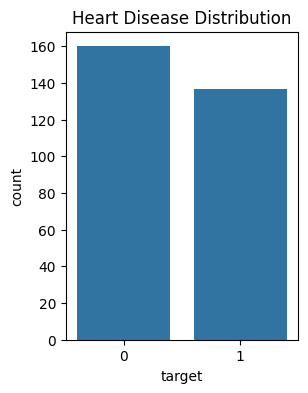

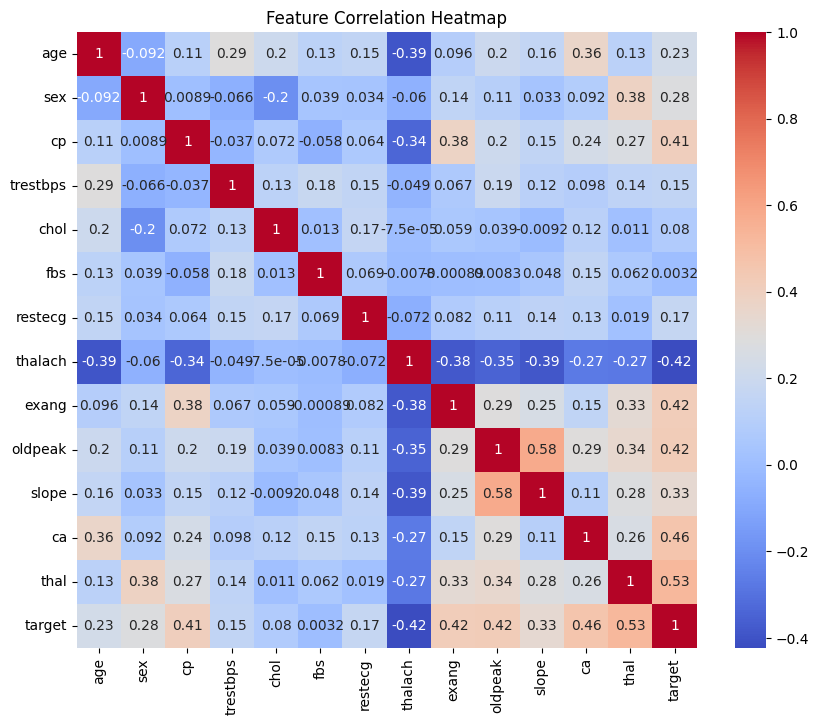

In [42]:
#Regress Log
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

#Lost in a RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

#Compare trained results prediction with actual outcome
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

#cONFUSioN Oooooo!
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

#Graph size, plots with yes=1 no=0
plt.figure(figsize=(3,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

#Gotta have connections
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()